# Modeling and Evaluation Notebook

## Objectives

* Answering Business requirement 2 : 
    * Predict whether a leaf is infected with powdery mildew or not. 

## Inputs

*  Client will input images of leaves from the following datasets : <br/>
    * inputs/cherry-leaves_dataset/cherry-leaves/train<br/>
    * inputs/cherry-leaves_dataset/cherry-leaves/validation <br/>
    * inputs/cherry-leaves_dataset/cherry-leaves/test <br/> 
    * image shape embeddings

## Outputs

* Generate images distribution plot in train, validation, and test set
* Perform image augmentation when needed
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Saved model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file




---

## Import packages 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Change working directory

* Since we are storing the notebooks in a subfolder, we change the working directory.

In [2]:
import os
current_dir = os.getcwd()
current_dir
os.chdir('/workspace/mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


* Confirm the working current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-in-cherry-leaves'

## Set input directories 

* Load Train Set, Validation and Test Set

In [4]:
my_data_dir = 'inputs/cherry-leaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

* Set output directory 

In [5]:
import os
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old Version is already available, create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old Version is already available, create a new version.


* Set Labels

In [6]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
    )

Project Labels: ['fungal-infected', 'healthy']


* Set image shape 

In [7]:
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(160, 160, 3)

# Number of images in Train, Test and Validation data

* Calculate the quantity of images in each set by generating a bar graph and save the resulting plot in the '/output/' directory.

* train - fungal-infected: 1472 images
* train - healthy: 1472 images
* validation - fungal-infected: 210 images
* validation - healthy: 210 images
* test - fungal-infected: 422 images
* test - healthy: 422 images




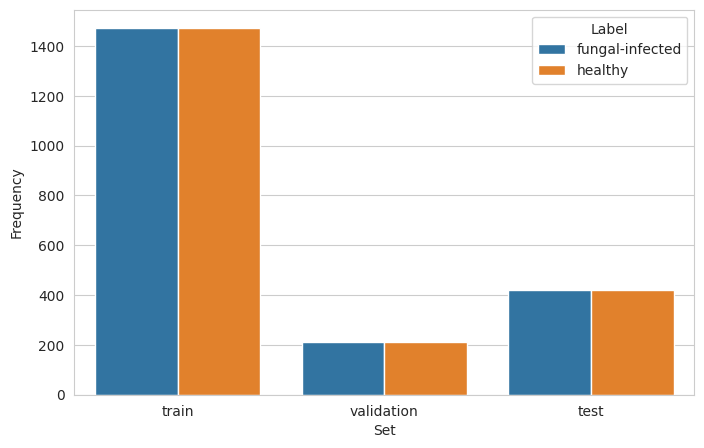

In [8]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

---

## Image Augmentation 

* We'll employ image data augmentation techniques to expand our dataset by generating randomized variations of existing images. This approach will help us augment our dataset, which is currently of a moderate size.

ImageDataGenerator

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
augmented_image_data = ImageDataGenerator(rotation_range=25,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

* Augment training image dataset 

In [11]:
batch_size = 32
train_set = augmented_image_data.flow_from_directory(train_path, #fetching images from train folder
                                                    target_size=image_shape[:2],#transforming images with average width and height 
                                                    color_mode='rgb',# standard RGB
                                                    batch_size=batch_size,
                                                    class_mode='binary', #binary class model
                                                    shuffle=True #Randomly shuffle the images
                                                    )
train_set.class_indices                                                    

Found 2944 images belonging to 2 classes.


{'fungal-infected': 0, 'healthy': 1}

* Augment validation image dataset

In [12]:
batch_size = 32 #a set of samples that you feed to the model when training. common is 32
validation_set = augmented_image_data.flow_from_directory(val_path, #fetching images from validation folder
                                                    target_size=image_shape[:2],#transforming images with average width and height 
                                                    color_mode='rgb',# standard RGB
                                                    batch_size=batch_size,
                                                    class_mode='binary', #binary class model
                                                    shuffle=False
                                                    )
train_set.class_indices    

Found 420 images belonging to 2 classes.


{'fungal-infected': 0, 'healthy': 1}

* Augment test image dataset

In [13]:
batch_size = 32
test_set = augmented_image_data.flow_from_directory(test_path, #fetching images from test folder
                                                    target_size=image_shape[:2],#transforming images with average width and height 
                                                    color_mode='rgb',# standard RGB
                                                    batch_size=batch_size,
                                                    class_mode='binary', #binary class model
                                                    shuffle=False
                                                    )
train_set.class_indices  

Found 844 images belonging to 2 classes.


{'fungal-infected': 0, 'healthy': 1}

* Plot Augmented Training image 

(32, 160, 160, 3)


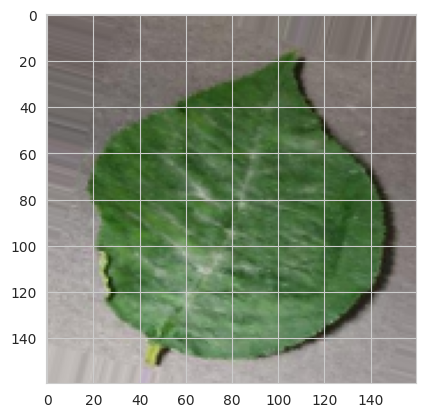

(32, 160, 160, 3)


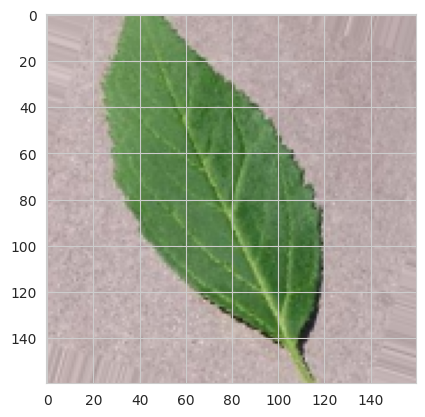

(32, 160, 160, 3)


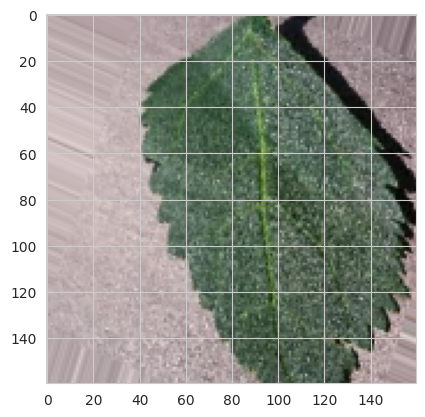

In [14]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

* Plot Validation Augmented set 

(32, 160, 160, 3)


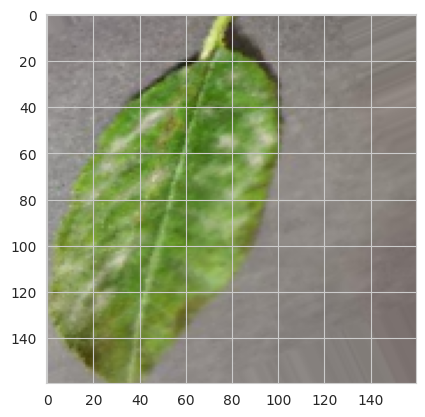

(32, 160, 160, 3)


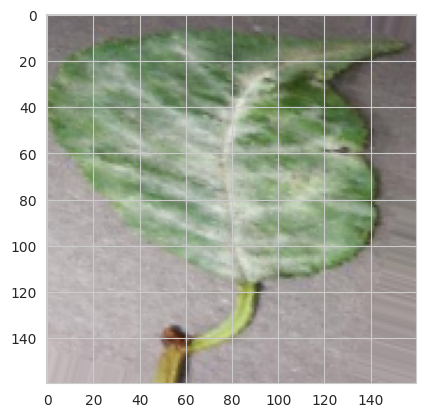

(32, 160, 160, 3)


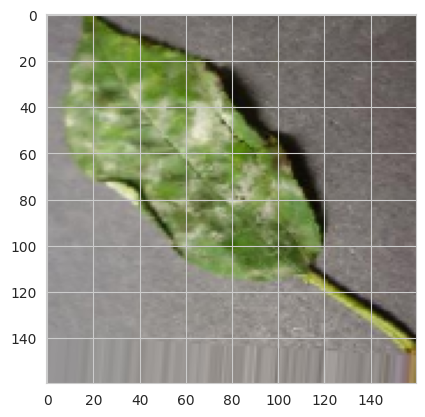

In [48]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

* Plot Augmented Test Dataset 

(32, 160, 160, 3)


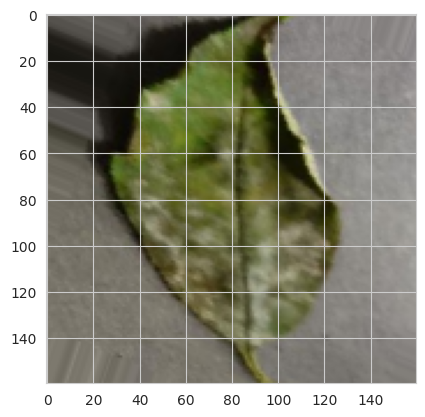

(32, 160, 160, 3)


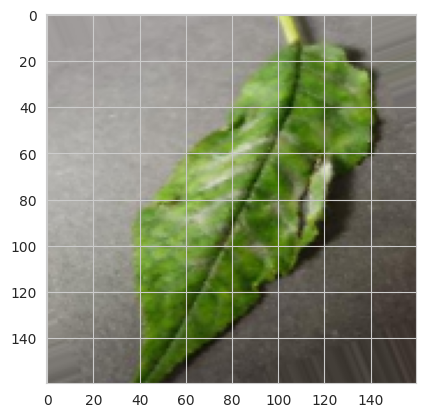

(32, 160, 160, 3)


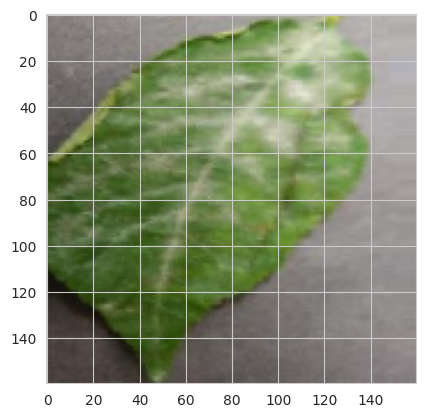

In [15]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

* Save class_indices in '.pkl' file

In [16]:
joblib.dump(value=train_set.class_indices ,
            filename=f'{file_path}/class_indices.pkl')

['outputs/v1/class_indices.pkl']

## Model Creation

### ML Model 

A Convolutional Neural Network (CNN) model will be develop to analyze pre-labeled leaf images. The model will be trained to identify the dominant feature in the dataset, which in this case is the presence of fungal infection in the leaf images.


* Import model packages

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool3D, MaxPooling2D

* Model

    * Deep Neural Networks  work with *Parameters* and *Hyperparameters* .
    * Hyperparameters tune the model's parameters so that we can control the performance of the model.

* Notes on the Chosen Parameters and Activation Models:

    * **Activation Function**:
        * The activation function sets boundaries to the output values from the neuron. It is crucial in processing inputs to generate an output.
    * **Adam (Adaptive Moment Estimation)**:
        * Adam is an optimization algorithm that updates network weights iteratively based on training data. It has gained popularity due to its effectiveness and ability to achieve good results in shorter training times compared to other options.
    * **Binary Crossentropy**:
        * Binary cross-entropy is the standard loss function for binary classification problems where the target values are 0 and 1. It measures the divergence between predicted and actual class probabilities. The loss increases as the predicted probability diverges from the actual class, providing a summary score of the difference between predicted and actual distributions.
    * **Binary Classification**:
        * In binary classification, the output layer predicts two classes. Sigmoid activation function is commonly used for binary classification tasks. It yields a probability between 0 and 1, allowing for a threshold (typically 0.5) to determine class predictions. If the probability is below the threshold, the prediction is class 0; otherwise, it is class 1.

In [18]:
#CNN model to be used 
def create_tf_model():
    model = Sequential() 

    ''' 
    Chose 'ReLu' as activation function because if the input is negative, then the output is 0, otherwise, the output is equal to the input.
    Convolution layers are used to select the dominant pixel value from non-dominant pixels in images using filters
    MaxPooling layers reduce the size of an image by extracting only the dominant pixel within the pool size
    Convination of both layers reduce the non-esential  part of the image and reduce complexity, therefore increasing accurracy 
    '''
    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())#Used to flatten the matrix into a vector 
    model.add(Dense(128, activation = 'relu'))#Does the matematical operation and gives the output

    model.add(Dropout(0.5))#Used to drop 50% of the nodes to avoid overfitting of the model 
    model.add(Dense(1, activation = 'sigmoid')) # used Sigmoid because if input is greater than zero, then neuron output is 1, otherwise is 0
                                                # outputs the probabilistic result 

    model.compile(loss='binary_crossentropy',  # used this hyperparameters because Our output layer should reflect a prediction of 2 classes.
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

### Model Summary

In [19]:
create_tf_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 77, 77, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

2024-03-10 18:18:23.417458: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* Seting up **early stop** to avoid overfitting or underfitting the model .

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### Fit model for training 

In [35]:
#Function that triggers the learning process and iterates over the number of epochs we choose
model = create_tf_model()
model.fit(train_set,
         epochs=20,
         steps_per_epoch= len(train_set.classes) // batch_size,
         validation_data= validation_set,#used to find out the Performance of the model while training
         callbacks= [early_stop],
         verbose=1 #Controls the visualisation of learning process.
         )

Epoch 1/20
92/92 [==============================] - 99s 1s/step - loss: 0.3007 - accuracy: 0.8696 - val_loss: 0.1383 - val_accuracy: 0.9405
Epoch 2/20
92/92 [==============================] - 93s 1s/step - loss: 0.0854 - accuracy: 0.9701 - val_loss: 0.0389 - val_accuracy: 0.9881
Epoch 3/20
92/92 [==============================] - 78s 841ms/step - loss: 0.0468 - accuracy: 0.9901 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 4/20
92/92 [==============================] - 84s 916ms/step - loss: 0.0442 - accuracy: 0.9901 - val_loss: 0.0198 - val_accuracy: 0.9929
Epoch 5/20
92/92 [==============================] - 86s 932ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0100 - val_accuracy: 0.9976
Epoch 6/20
92/92 [==============================] - 76s 828ms/step - loss: 0.0228 - accuracy: 0.9935 - val_loss: 0.0159 - val_accuracy: 0.9952
Epoch 7/20
92/92 [==============================] - 74s 805ms/step - loss: 0.0672 - accuracy: 0.9749 - val_loss: 0.0719 - val_accuracy: 0.9667
Epoch

* Save model to 'outputs' folder

In [36]:
model.save('outputs/v1/powdery_mildew_detector_model.h5')

### Model Performance

* Model Learning curve

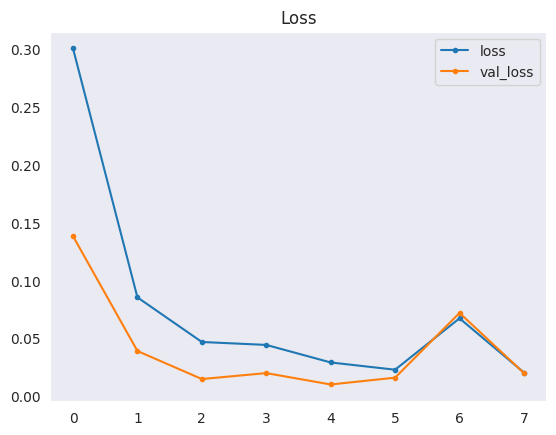

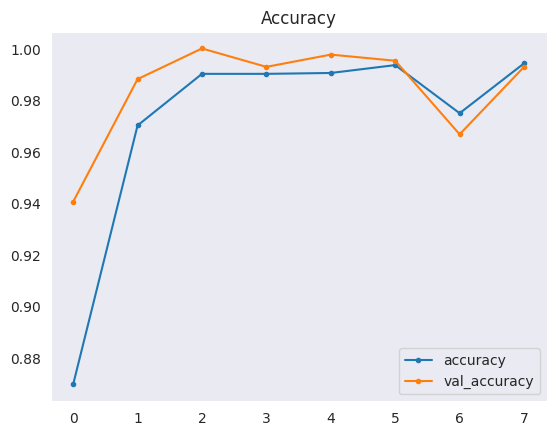

In [37]:
losses = pd.DataFrame(model.history.history)

sns.set_style("dark")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation 

* Load saved model 

In [38]:
from keras.models import load_model
model = load_model('outputs/v1/powdery_mildew_detector_model.h5')

* Evaluate model on Test Set

In [39]:
evaluation = model.evaluate(test_set)

27/27 [==============================] - 11s 403ms/step - loss: 0.0218 - accuracy: 0.9905


* Save Evaluation  to '.pkl' file 

In [40]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

## Model prediction on new data 

* Load random image as PIL

 Image shape: (160, 160), Image mode: RGB


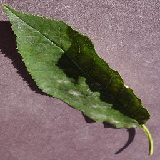

In [41]:
from tensorflow.keras.preprocessing import image

pointer = 66
label = labels[0] 
pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/' + label)[pointer],
                            target_size= image_shape, color_mode='rgb')

print(f" Image shape: {pil_image.size}, Image mode: {pil_image.mode}")
pil_image

* Convert image to array and prepare for prediction 

In [42]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image,axis=0)
print(my_image.shape)

(1, 160, 160, 3)


* Predict class probabilities 

In [43]:
pred_proba = model.predict(my_image)[0,0]

target_map = {v: k for k,v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]: pred_proba = 1 - pred_proba
print(pred_proba)
print(pred_class)

1.0
healthy


## Push files to repo 

* Gitnore

In [44]:

!cat .gitignore

core.Microsoft*
core.mongo*
core.python*
env.py
__pycache__/
*.py[cod]
node_modules/
.github/
cloudinary_python.txt
kaggle.json
*.jpg

* Git status

In [31]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   jupyter_notebooks/01 - Data Collection.ipynb
	modified:   jupyter_notebooks/02 - DataVisualization.ipynb
	modified:   jupyter_notebooks/03 - Modelling and Evaluating.ipynb
	modified:   outputs/v1/evaluation.pkl
	modified:   outputs/v1/labels_distribution.png
	modified:   outputs/v1/model_training_acc.png
	modified:   outputs/v1/model_training_losses.png
	modified:   outputs/v1/powdery_mildew_detector_model.h5

no changes added to commit (use "git add" and/or "git commit -a")


In [32]:
!git add .

In [33]:
!git commit -m " Fit the model , train it and store the results"

[main 8a89aae]  Fit the model , train it and store the results
 8 files changed, 133 insertions(+), 118 deletions(-)


In [34]:
!git push

Enumerating objects: 25, done.
Counting objects: 100% (25/25), done.
Delta compression using up to 16 threads
Compressing objects: 100% (11/11), done.
Writing objects: 100% (13/13), 28.87 MiB | 11.77 MiB/s, done.
Total 13 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/FerchaPombo/mildew-detection-in-cherry-leaves.git
   1f266d7..8a89aae  main -> main
